# ***`INTRODUCTION`***

### ***`The dataset contains medical insurance cost records based on various personal and health-related factors. The objective is to apply regression models to predict insurance charges (charges) using features like age, BMI, number of children, smoking status, gender, and region.Since charges is a continuous variable, regression techniques such as Linear Regression, Polynomial Regression, Decision Tree Regression, and Random Forest Regression will be used to analyze relationships between features and medical costs. Key patterns, such as higher costs for smokers and the influence of age and BMI, make this dataset ideal for predictive modeling in healthcare and insurance industries.`***

# ***`importing the libraries`***

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ***`load dataset`***

In [ ]:
df = pd.read_csv('/content/insurance.csv')

# ***`basic details`***

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### ***`first 5 rows`***

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### ***`rows and columns`***

In [ ]:
df.shape

(1338, 7)

### ***`information`***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### ***`missing values`***

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### ***`datatypes`***

In [ ]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


## ***`sex, smoker and region columns are of categorical features`***

### ***`statistical Measures`***

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# ***`visualisation`***

### ***`Age Distribution`***

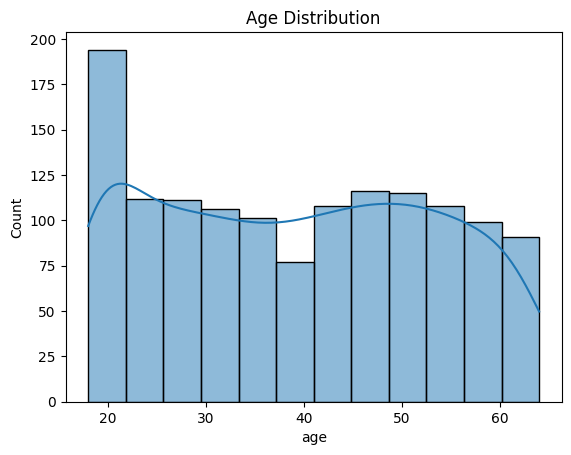

In [ ]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

### ***`sex column`***

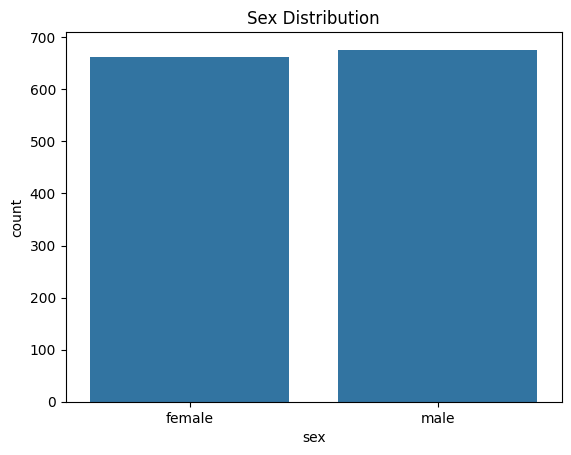

In [ ]:
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

### ***`BMI Distribution`***

<ipython-input-12-8230c4452551>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


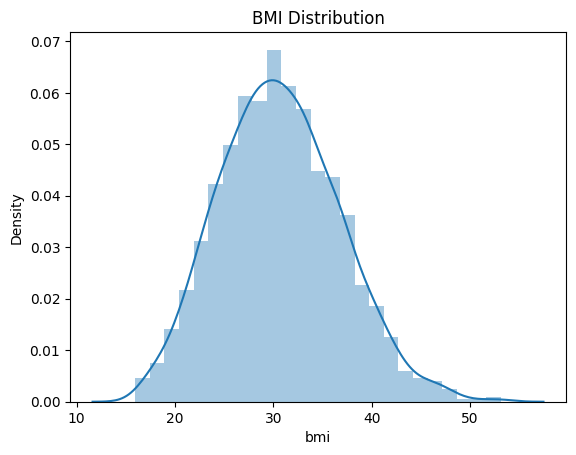

In [ ]:
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

### ***`children`***

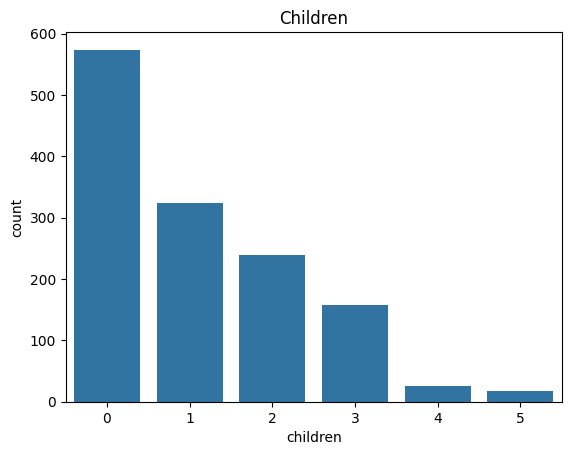

In [ ]:
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

### ***`smoker`***

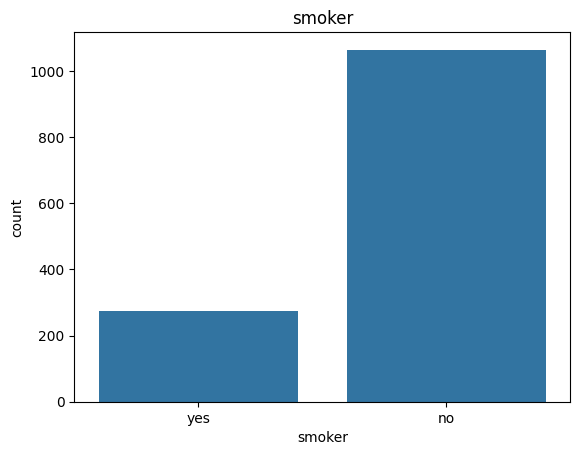

In [ ]:
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

### ***`region`***

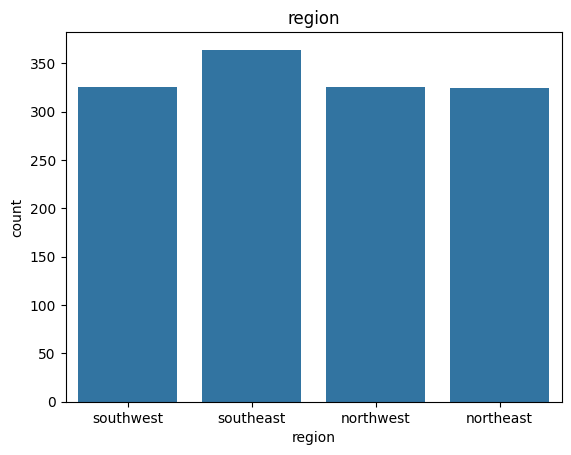

In [ ]:
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

### ***`charges`***

<ipython-input-16-42f763c351fc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


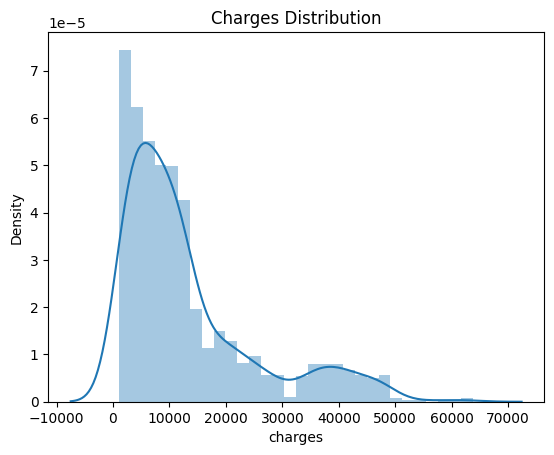

In [ ]:
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

# ***`encoding the categorical features`***

In [ ]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
dummy=pd.get_dummies(df[['sex','smoker','region']])
dummy

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,True,False,False,True,False,False,False,True
1,False,True,True,False,False,False,True,False
2,False,True,True,False,False,False,True,False
3,False,True,True,False,False,True,False,False
4,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,False,True,True,False,False,True,False,False
1334,True,False,True,False,True,False,False,False
1335,True,False,True,False,False,False,True,False
1336,True,False,True,False,False,False,False,True


In [ ]:
dummy.columns

Index(['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

### ***`Join df & dummy`***

In [ ]:
dfe = pd.concat([df,dummy],axis=1)
dfe

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,True,False,False,True,False,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,False,True,True,False,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,False,True,True,False,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,False,True,True,False,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,False,True,True,False,False,True,False,False
1334,18,female,31.920,0,no,northeast,2205.98080,True,False,True,False,True,False,False,False
1335,18,female,36.850,0,no,southeast,1629.83350,True,False,True,False,False,False,True,False
1336,21,female,25.800,0,no,southwest,2007.94500,True,False,True,False,False,False,False,True


In [ ]:
dfe.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

### ***`Remove /Drop unwanted columns`***

In [ ]:
df1 = dfe.drop(['sex','smoker','region'],axis=1)
df1

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [ ]:
df1.dtypes

,0
age,int64
bmi,float64
children,int64
charges,float64
sex_female,bool
sex_male,bool
smoker_no,bool
smoker_yes,bool
region_northeast,bool
region_northwest,bool


In [ ]:
df1

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


***`Correlation Heatmap`***

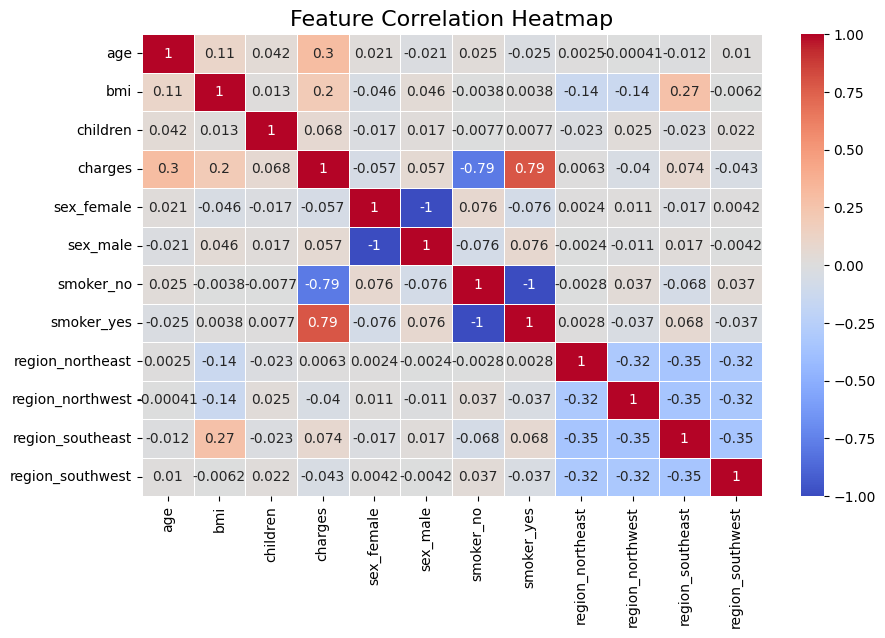

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

# ***`features and target`***

In [ ]:
x = df1.drop(columns='charges', axis=1)
y = df1['charges']

In [ ]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


In [ ]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


# ***`split the data`***

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

### **`model implementation`**

# ***`linear regression`***

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([ 1917.97181268, 11986.25940683, 10490.48005024,  2304.12993764,
        8293.50537439, 11166.05230839,  3358.09571616,  1110.00194483,
       12035.96686456,  9458.90891087, 11475.43801642,  4977.20823308,
       29988.80508348,  -333.98329066, 12839.16716952, 13302.13897035,
        4214.06014424,  7733.66701876, 29469.42265735,  2785.76430971,
       12330.84787632,  1943.6920458 , 34165.03632868, 32149.01814535,
       30372.03803201,  8680.40490722,  2331.07291026, 15346.88495896,
        6246.75682763,  1918.54519042,  9560.23819844,  5634.94852703,
        4111.97039758,  4832.1119442 ,  9655.10533141,  4682.16691117,
       29949.10058733,  6469.8521875 , 27630.83244058, 14053.65862895,
         128.3473841 , 28081.44965538,  7705.33345681,  1156.07310721,
       10352.68302279,  7709.6729657 , 11446.95109489,  8252.72561517,
       10849.18051924, 13488.08449559,  6190.71978812, -1080.89646296,
       26159.10918883, 36998.24425008,  7049.80237712, 17578.36536406,
      

In [ ]:
print(" linear Regression MAE:",mean_absolute_error(y_test,y_pred))
print(" linear Regression MSE:",mean_squared_error(y_test,y_pred))
print(" linear Regression R2 SCORE:",r2_score(y_test,y_pred)*100)

 linear Regression MAE: 4279.860834219366
 linear Regression MSE: 38304871.348685935
 linear Regression R2 SCORE: 74.49415564623685


### ***`multiple linear regression same as linear regresssion`***

# ***`polynomial regression`***

In [ ]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [ ]:
poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = poly_reg.predict(x_test_poly)

In [ ]:
print(" polynomial Regression MAE:",mean_absolute_error(y_test,y_pred))
print(" polynomial Regression MSE:",mean_squared_error(y_test,y_pred))
print(" polynomial Regression R2 SCORE:",r2_score(y_test,y_pred)*100)

 polynomial Regression MAE: 2833.086420585937
 polynomial Regression MSE: 22168258.052775048
 polynomial Regression R2 SCORE: 85.2389495231255


# ***`decision tree regressor`***

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = dt_regressor.predict(x_test)

In [ ]:
print(" decision tree Regression MAE:",mean_absolute_error(y_test,y_pred))
print(" decision tree Regression MSE:",mean_squared_error(y_test,y_pred))
print(" decision tree Regression R2 SCORE:",r2_score(y_test,y_pred)*100)

 decision tree Regression MAE: 2740.106983768657
 decision tree Regression MSE: 35590883.01282882
 decision tree Regression R2 SCORE: 76.30130344846215


# ***`random forest regressor`***

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_regressor.predict(x_test)

In [ ]:
print(" random forest Regression MAE:",mean_absolute_error(y_test,y_pred_rf))
print(" random forest Regression MSE:",mean_squared_error(y_test,y_pred_rf))
print(" random forest Regression R2 SCORE:",r2_score(y_test,y_pred_rf)*100)

 random forest Regression MAE: 2723.180033204441
 random forest Regression MSE: 24086795.554085042
 random forest Regression R2 SCORE: 83.96146399263438


# ***`Hyper parameter tuning`***

In [ ]:
dt_params = {"max_depth": [3, 5, 10, None]}

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)

In [ ]:
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring="r2", n_jobs=-1)
dt_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None]}, scoring='r2')

In [ ]:
print("Best Hyperparameters:", dt_grid.best_params_)

Best Hyperparameters: {'max_depth': 3}


In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=42,max_depth= 3)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

***prediction and evaluation***

In [ ]:
y_pred1 = dt_regressor.predict(x_test)

In [ ]:
print(" decision tree Regression MAE:",mean_absolute_error(y_test,y_pred1))
print(" decision tree Regression MSE:",mean_squared_error(y_test,y_pred1))
print(" decision tree Regression R2 SCORE:",r2_score(y_test,y_pred1)*100)

 decision tree Regression MAE: 2771.903832292089
 decision tree Regression MSE: 22388468.93740381
 decision tree Regression R2 SCORE: 85.09231896803976


### ***`random forest regressor (hyperparameter tuning)`***

In [ ]:
rf_params = {"n_estimators": [50, 100, 200],"max_depth": [5, 10, None]}

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring="r2", n_jobs=-1)
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [ ]:
print(" Best Hyperparameters:", rf_grid.best_params_)

 Best Hyperparameters: {'max_depth': 5, 'n_estimators': 200}


In [ ]:
rf_regressor = RandomForestRegressor(max_depth=5 , n_estimators= 200)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=200)

***prediction and evaluation***

In [ ]:
y_pred_rf1 = rf_regressor.predict(x_test)

In [ ]:
print(" random forest Regression MAE:",mean_absolute_error(y_test,y_pred_rf1))
print(" random forest Regression MSE:",mean_squared_error(y_test,y_pred_rf1))
print(" random forest Regression R2 SCORE:",r2_score(y_test,y_pred_rf1)*100)

 random forest Regression MAE: 2452.4591772959648
 random forest Regression MSE: 20790365.289503716
 random forest Regression R2 SCORE: 86.15643905170947


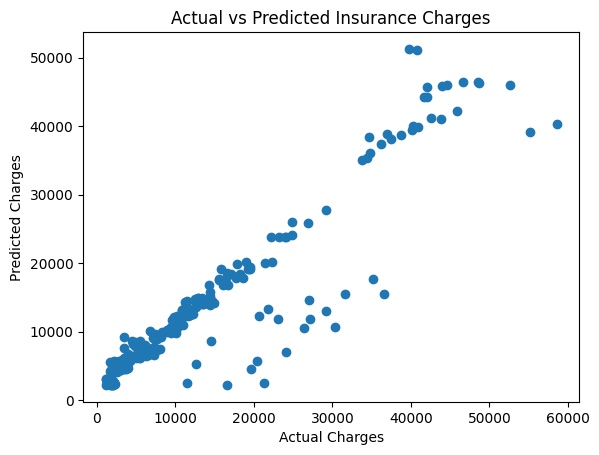

In [ ]:
plt.scatter(y_test, y_pred_rf1)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()

In [ ]:
# R² Score tells us how well the model fits the data.
# Higher R² (closer to 1) = better model performance.

# ***`CONCLUSION`***

### ***`The R² score helps compare models by measuring how well they explain variability, with higher scores indicating better performance.The Random Forest model with hyperparameter tuning performs best with an R² score of 86.17%, capturing the most variance and ensuring accurate predictions. Polynomial Regression follows closely with 85.23%, indicating a non-linear relationship between variables. Decision Tree models show improvement over Linear Regression, which, with an R² score of 74.49%, serves as a baseline.`***

# ***`In conclusion, Random Forest with tuning is the most effective model for accuracy and generalization, while Polynomial Regression remains a viable choice for better interpretability.`***